In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

#**INTRODUCTION**

This project is a Capstone Case Study for the Google Data Analytics Professional Certificate done by **Alifia Ganjaraharja**.

**OVERVIEW OF THE BELLABEAT COMPANY**

Bellabeat is the go-to wellness brand for women with an ecosystem of products and services focus on women's health.They are a small successful company with the potential to become a larger player in the global smart device. Found by Urska Srsen and Sando Mur, Bellebeat wants to analyze data that could help unlock new opportunities by gain some marketing strategies.

**BUSINESS TASK** 

Bellabeat wants to analyze the usage of the data from one of their products to understand to gain insights to how consumers are already using their smart devices then use these insights to make high-level-recommendations that will guide their marketing strategy.

**STAKEHOLDER**

The stakeholder includes:
1. Urska Srsen, Bellabeat's co-founder and Chief Executive Officer
2. Sando Mur, Mathematician and Bellabeat's Co-founder
3. BellaBeat's Marketing Analytics Team

#**DATA PREPARATION**

**Data Source**:


The **FitBit Fitness Tracker Data** dataset by **Mobius** under the licence **CCO:Public Domain** was used. This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.  30 eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
[](http://www.kaggle.com/datasets/arashnic/fitbit) 

**Data Integrity & Credibility**

Dataset does not **ROCCC**:
1. The dataset is **not Reliable** since it only shows data from only 30 women. It does not show demographics or geographical data and has a very small sample size.
2. The dataset is **not Original**. The provenance section shows that the data has been preprocessed.
3. The dataset is **Comprehensive**: The metrics in the dataset matches the needs of Bellabeat.
4. The dataset is **not Current**: The dataset was last updated three years ago, displaying data from 2016.
5. The dataset is **not Cited**: Data was collected by third party and the author name is blank.

**Sorting & Filtering**

My analysis is focused on trends in the usage of the app which is why my analysis will be focused on user engagement. 

In [2]:
#Loading readr package
library(readr)

In [3]:
#Importing Datasets
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
daily_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
daily_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
daily_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
hourly_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
hourly_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
hourly_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
#Show the first few rows of daily_activity data frame with head() function
head(daily_activity)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

In [12]:
head(daily_calories)

Id         ActivityDay Calories
1 1503960366 4/12/2016   1985    
2 1503960366 4/13/2016   1797    
3 1503960366 4/14/2016   1776    
4 1503960366 4/15/2016   1745    
5 1503960366 4/16/2016   1863    
6 1503960366 4/17/2016   1728

In [13]:
head(daily_steps)

Id         ActivityDay StepTotal
1 1503960366 4/12/2016   13162    
2 1503960366 4/13/2016   10735    
3 1503960366 4/14/2016   10460    
4 1503960366 4/15/2016    9762    
5 1503960366 4/16/2016   12669    
6 1503960366 4/17/2016    9705

In [14]:
head(daily_sleep)

Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                 327               
2 1503960366 4/13/2016 12:00:00 AM 2                 384               
3 1503960366 4/15/2016 12:00:00 AM 1                 412               
4 1503960366 4/16/2016 12:00:00 AM 2                 340               
5 1503960366 4/17/2016 12:00:00 AM 1                 700               
6 1503960366 4/19/2016 12:00:00 AM 1                 304               
  TotalTimeInBed
1 346           
2 407           
3 442           
4 367           
5 712           
6 320

In [15]:
head(daily_intensities)

Id         ActivityDay SedentaryMinutes LightlyActiveMinutes
1 1503960366 4/12/2016    728             328                 
2 1503960366 4/13/2016    776             217                 
3 1503960366 4/14/2016   1218             181                 
4 1503960366 4/15/2016    726             209                 
5 1503960366 4/16/2016    773             221                 
6 1503960366 4/17/2016    539             164                 
  FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
1 13                  25                0                      
2 19                  21                0                      
3 11                  30                0                      
4 34                  29                0                      
5 10                  36                0                      
6 20                  38                0                      
  LightActiveDistance ModeratelyActiveDistance VeryActiveDistance
1 6.06                0.55                     1.88              
2 4.71                0.69                     1.57              
3 3.91                0.40                     2.44              
4 2.83                1.26                     2.14              
5 5.04                0.41                     2.71              
6 2.51                0.78                     3.19

In [16]:
head(hourly_steps)

Id         ActivityHour          StepTotal
1 1503960366 4/12/2016 12:00:00 AM 373      
2 1503960366 4/12/2016 1:00:00 AM  160      
3 1503960366 4/12/2016 2:00:00 AM  151      
4 1503960366 4/12/2016 3:00:00 AM    0      
5 1503960366 4/12/2016 4:00:00 AM    0      
6 1503960366 4/12/2016 5:00:00 AM    0

In [17]:
head(hourly_calories)

Id         ActivityHour          Calories
1 1503960366 4/12/2016 12:00:00 AM 81      
2 1503960366 4/12/2016 1:00:00 AM  61      
3 1503960366 4/12/2016 2:00:00 AM  59      
4 1503960366 4/12/2016 3:00:00 AM  47      
5 1503960366 4/12/2016 4:00:00 AM  48      
6 1503960366 4/12/2016 5:00:00 AM  48

In [18]:
head(hourly_intensities)

Id         ActivityHour          TotalIntensity AverageIntensity
1 1503960366 4/12/2016 12:00:00 AM 20             0.333333        
2 1503960366 4/12/2016 1:00:00 AM   8             0.133333        
3 1503960366 4/12/2016 2:00:00 AM   7             0.116667        
4 1503960366 4/12/2016 3:00:00 AM   0             0.000000        
5 1503960366 4/12/2016 4:00:00 AM   0             0.000000        
6 1503960366 4/12/2016 5:00:00 AM   0             0.000000

In [19]:
#Load dplyr package to use the distinct() function
library(dplyr)

In [20]:
#Checking distinct value to find out sample size using distinct() function for each data frame

#daily_activity data frame sample size
n_distinct(daily_activity$Id)

[1] 33

In [21]:
#daily_calories data fraame sample size
n_distinct(daily_calories$Id)

[1] 33

In [22]:
#daily_steps data frame sample size
n_distinct(daily_steps$Id)

[1] 33

In [23]:
#daily_sleep data frame sample size
n_distinct(daily_sleep$Id)

[1] 24

In [24]:
#daily_intensities data frame sample size
n_distinct(daily_intensities$Id)

[1] 33

In [25]:
#hourly_steps data frame sample size
n_distinct(hourly_steps$Id)

[1] 33

In [26]:
#hourly_calories data frame sample size
n_distinct(hourly_calories$Id)

[1] 33

In [27]:
#hourly_intensities data frame sample size
n_distinct(hourly_intensities$Id)

[1] 33

In [28]:
library(lubridate)

#**CLEANING PROCESS**

In [29]:
#create new data frame under the name clean_daily_activity for further analysis
clean_daily_activity <- daily_activity

In [30]:
#change the data type of ActivityDate from character to date
clean_daily_activity$ActivityDate <- mdy(clean_daily_activity$ActivityDate)


In [31]:
head(clean_daily_activity)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 2016-04-12   13162      8.50          8.50           
2 1503960366 2016-04-13   10735      6.97          6.97           
3 1503960366 2016-04-14   10460      6.74          6.74           
4 1503960366 2016-04-15    9762      6.28          6.28           
5 1503960366 2016-04-16   12669      8.16          8.16           
6 1503960366 2016-04-17    9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

In [32]:
#create a new data frame under the name clean_daily_intenstities for further analysis
clean_daily_intensities <- daily_intensities

In [33]:
#change the data type of ActivityDay from character to date
clean_daily_intensities$ActivityDay <- mdy(clean_daily_intensities$ActivityDay)

In [34]:
head(clean_daily_intensities)

Id         ActivityDay SedentaryMinutes LightlyActiveMinutes
1 1503960366 2016-04-12   728             328                 
2 1503960366 2016-04-13   776             217                 
3 1503960366 2016-04-14  1218             181                 
4 1503960366 2016-04-15   726             209                 
5 1503960366 2016-04-16   773             221                 
6 1503960366 2016-04-17   539             164                 
  FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
1 13                  25                0                      
2 19                  21                0                      
3 11                  30                0                      
4 34                  29                0                      
5 10                  36                0                      
6 20                  38                0                      
  LightActiveDistance ModeratelyActiveDistance VeryActiveDistance
1 6.06                0.55                     1.88              
2 4.71                0.69                     1.57              
3 3.91                0.40                     2.44              
4 2.83                1.26                     2.14              
5 5.04                0.41                     2.71              
6 2.51                0.78                     3.19

In [35]:
#create a new data frame under the name clean_daily_steps for further analysis
clean_daily_steps <- daily_steps

In [36]:
#change the data type of ActivityDay from character to date
clean_daily_steps$ActivityDay <- mdy(clean_daily_steps$ActivityDay)

In [37]:
head(clean_daily_steps)

Id         ActivityDay StepTotal
1 1503960366 2016-04-12  13162    
2 1503960366 2016-04-13  10735    
3 1503960366 2016-04-14  10460    
4 1503960366 2016-04-15   9762    
5 1503960366 2016-04-16  12669    
6 1503960366 2016-04-17   9705

In [38]:
#create a new data frame under the name of clean_daily_calories for further analysis
clean_daily_calories <- daily_calories

In [39]:
#change the data type of ActivityDay from character to date
clean_daily_calories$ActivityDay <- mdy(clean_daily_calories$ActivityDay)

In [40]:
head(clean_daily_calories)

Id         ActivityDay Calories
1 1503960366 2016-04-12  1985    
2 1503960366 2016-04-13  1797    
3 1503960366 2016-04-14  1776    
4 1503960366 2016-04-15  1745    
5 1503960366 2016-04-16  1863    
6 1503960366 2016-04-17  1728

#**ANALYSIS**

Let's look at the summaries!

In [41]:
#summary of clean_daily_activity data frame
summary(clean_daily_activity)

       Id             ActivityDate          TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDist

In [42]:
#checking for identical from two data frame (daily_activity & daily_intensities) using identical() function
identical(daily_activity$Id,daily_intensities$Id)


[1] TRUE

In [43]:
identical(daily_activity$ActivityDate,daily_intensities$ActivityDay)

[1] TRUE

In [44]:
identical(daily_activity$SedentaryMinutes,daily_intensities$SedentaryMinutes)

[1] TRUE

In [45]:
identical(daily_activity$VeryActiveMinutes,daily_intensities$VeryActiveMinutes)

[1] TRUE

In [46]:
identical(daily_activity$FairlyActiveMinutes,daily_intensities$FairlyActiveMinutes)

[1] TRUE

In [47]:
identical(daily_activity$LightlyActiveMinutes,daily_intensities$LightlyActiveMinutes)

[1] TRUE

In [48]:
identical(daily_activity$SedentaryActiveDistance,daily_intensities$SedentaryActiveDistance)

[1] TRUE

In [49]:
#checking for identical for two data frame (daily_activity & daily_calories) using identical() function
identical(daily_activity$Id,daily_calories$Id)

[1] TRUE

In [50]:
identical(daily_activity$Calories,daily_calories$Calories)

[1] TRUE

In [51]:
#checking for identical for two data frame (daily_activity & daily_steps) using identical () function
identical(daily_activity$Id,daily_steps$Id)

[1] TRUE

In [52]:
identical(daily_activity$TotalSteps,daily_steps$StepTotal)

[1] TRUE

In [53]:
#merging two data frames (daily_activity & daily_sleep) using the left_join() function, combining them by ID
activity_sleep <- left_join(daily_activity,daily_sleep,by=c(Id="Id"))

Warning message in left_join(daily_activity, daily_sleep, by = c(Id = "Id")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [54]:
head(activity_sleep)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.5           8.5            
2 1503960366 4/12/2016    13162      8.5           8.5            
3 1503960366 4/12/2016    13162      8.5           8.5            
4 1503960366 4/12/2016    13162      8.5           8.5            
5 1503960366 4/12/2016    13162      8.5           8.5            
6 1503960366 4/12/2016    13162      8.5           8.5            
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.88               0.55                    
3 0                        1.88               0.55                    
4 0                        1.88               0.55                    
5 0                        1.88               0.55                    
6 0                        1.88               0.55                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 6.06                0                       25               
3 6.06                0                       25               
4 6.06                0                       25               
5 6.06                0                       25               
6 6.06                0                       25               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                  728              1985    
2 13                  328                  728              1985    
3 13                  328                  728              1985    
4 13                  328                  728              1985    
5 13                  328                  728              1985    
6 13                  328                  728              1985    
  SleepDay              TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
1 4/12/2016 12:00:00 AM 1                 327                346           
2 4/13/2016 12:00:00 AM 2                 384                407           
3 4/15/2016 12:00:00 AM 1                 412                442           
4 4/16/2016 12:00:00 AM 2                 340                367           
5 4/17/2016 12:00:00 AM 1                 700                712           
6 4/19/2016 12:00:00 AM 1                 304                320

In [55]:
#find out how many times user engaged with the smart device by calcuating the average usage for the users

#1st count the summarize Id of the activity_sleep data frame
Id_counts <- activity_sleep %>%
    group_by(Id) %>%
    summarize(Usage_count = n())

print(Id_counts)

# A tibble: 33 × 2
           Id Usage_count
        <dbl>       <int>
 1 1503960366         775
 2 1624580081          31
 3 1644430081         120
 4 1844505072          93
 5 1927972279         155
 6 2022484408          31
 7 2026352035         868
 8 2320127002          31
 9 2347167796         270
10 2873212765          31
# ℹ 23 more rows


In [56]:
#2nd finding out the average usage for the users
average_count <- activity_sleep %>%
    group_by(Id) %>%
    summarize(Usage_count = n()) %>%
    summarize(Average_Usage = mean(Usage_count))

print(average_count)

# A tibble: 1 × 1
  Average_Usage
          <dbl>
1          384.


**SHARING MY FINDINGS**

In [57]:
library(ggplot2)

In [58]:
#finding out the relationship between total steps with calories burnt
ggplot(data = daily_activity, mapping = aes(x = TotalSteps, y = Calories, colour = Calories)) + geom_point() + geom_smooth() + labs(title = "Total Steps vs Calories")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


From this scatterplot, it is evident that there is a positive relationship between the number of steps taken and the amount of calories burned. The more steps taken by the users, the higher the amount of calories burned.

Next, I want to find out about the relationship between the total time in bed and the total time spent on sleeping.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


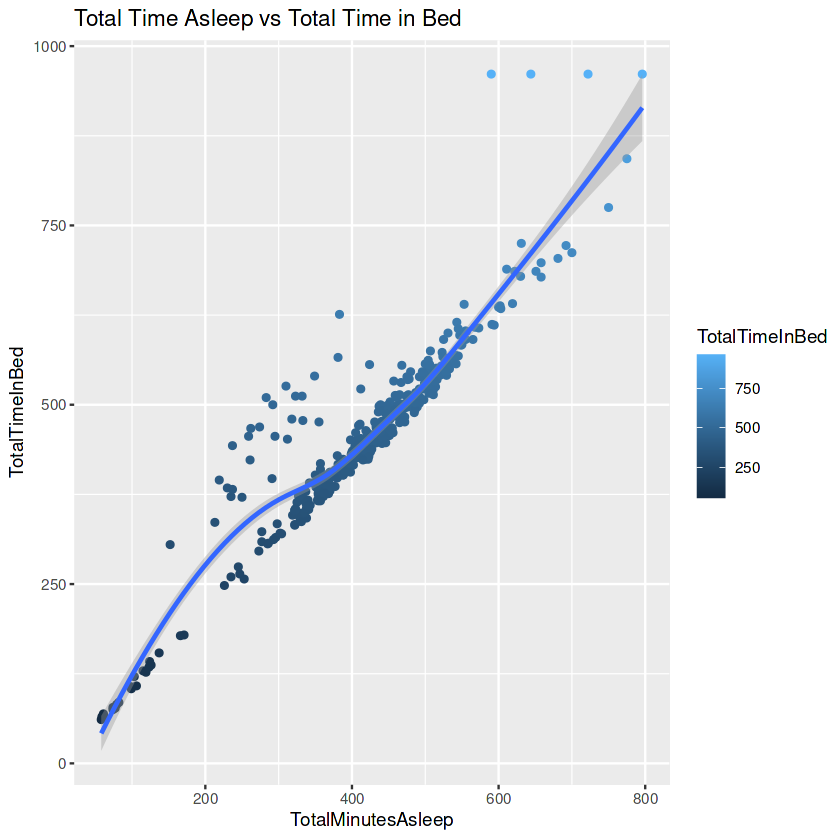

In [59]:
#finding out the relationship between total time in bed with total time sleeping
ggplot(data = daily_sleep, mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed, colour = TotalTimeInBed)) + geom_point() + geom_smooth() + labs(title = "Total Time Asleep vs Total Time in Bed")

It appears that the relationship between *Total time in bed* and *Total time asleep* are **closely related** which means that as the user increase the amount of time they spend in bed, the amount of time they actually spend asleep also increases in a proportional manner. This suggests efficient sleep and consistent sleep patterns.

In [60]:
#finding out the user engagement by summarizing the Usage count
user_engagement <- clean_daily_activity %>%
  group_by(ActivityDate) %>%
  summarize(Usage_Count = n())

head(user_engagement)

ActivityDate Usage_Count
1 2016-04-12   33         
2 2016-04-13   33         
3 2016-04-14   33         
4 2016-04-15   33         
5 2016-04-16   32         
6 2016-04-17   32

In [61]:
#merging two data frame (clean_daily_steps & user_engagement) using the left_join() function, combining them by ActivityDate
usage_steps <- left_join(clean_daily_steps,user_engagement,by=c(ActivityDay = "ActivityDate"))

In [62]:
head(usage_steps)

Id         ActivityDay StepTotal Usage_Count
1 1503960366 2016-04-12  13162     33         
2 1503960366 2016-04-13  10735     33         
3 1503960366 2016-04-14  10460     33         
4 1503960366 2016-04-15   9762     33         
5 1503960366 2016-04-16  12669     32         
6 1503960366 2016-04-17   9705     32

In [63]:
#finding out a correlation between User Engagement and Total Steps
ggplot(data = usage_steps, mapping = aes(x = Usage_Count, y = StepTotal, colour = StepTotal)) + geom_point() + geom_smooth() + labs(title = "Frequency vs Total Steps")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


There is some relationship between the User Engagement and Total Steps, so it means that the users tend to be engaged on the app when they take more steps. 

Next, I want to find out if the frequency/user engagement relates to calories burnt.

In [64]:
#merging two data frame (clean_daily_calories & user_engagement) using the left_join() function, combining by ActivityDate
usage_calories <- left_join(clean_daily_calories,user_engagement,by=c(ActivityDay = "ActivityDate"))

In [65]:
head(usage_calories)

Id         ActivityDay Calories Usage_Count
1 1503960366 2016-04-12  1985     33         
2 1503960366 2016-04-13  1797     33         
3 1503960366 2016-04-14  1776     33         
4 1503960366 2016-04-15  1745     33         
5 1503960366 2016-04-16  1863     32         
6 1503960366 2016-04-17  1728     32

In [66]:
#finding out the relationship between User_engagement with Calories burnt
ggplot(data = usage_calories, mapping = aes(x = Usage_Count, y = Calories, colour = Calories)) + geom_point() + geom_smooth() + labs(title = "User Engagement vs Calories Burnt")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


It also appears that more users engage with the app while they burn calories becasue this scatterplot show there is a positive relationship between these two factors.

#**SUMMARY**

The business objective/task was to gain insights into trends in how users were already using their smart devices. The data from the scatterplots has shown a positive correlation or relationship between two variables or factors. This indicates that users engage with the app when they are about to go about their activities.

However, in my opinion, I believe Bellabeat's marketing analytics team will need to source more data to properly target users with customized needs, as the current data does not fully meet the ROCCC criteria.

**RECOMMENDATIONS**

My overall recommendations are focused on activities that will cause more users to engage with the app and with the company (Bellabeat) in general, by doing:

1. **Customer Engagament**: create engaging content and resources related to fitness, health, and wellness (based on the user recent data with their smart products). Share these resources through blogs, social media, or newsletters to keep customers engaged and informed. And also don't forget to keep the users update with any new feature of the company try to offer.
2. **Content Marketing**: pretty similar to Customer Engagement, Content Marketing here is to invest creating a high-quality content that addresses customer pain points and needs with the output to make some improvement. Content can include blog posts, videos, webinars, and podcasts.
3. **Retention Strategy**: there is a set of actions to implement strategies in order to keep existing customers engaged, satisfied, and loyal to a brand and product over an extended period. And I think this could be a great recommendation and consideration for Marketing Analytic Team of Bellabeat in order to not only gain insight for Marketing Strategy matter, but also to keep the existing customers on the loop of what is going within the company (Bellabeat). For example, *customized personalization customer-based*. This can include personalized product recommendations, content, or offers based on the customer's past behavior or preferences. Personalization makes customers feel valued and understood. Then also consider about *loyalty progams*. Loyalty programs reward customers for their repeat business. This could include points, discounts, or exclusive access to special events or content. Or perhaps including the Birthday gift could also be a great idea. By doing such programs could lead customers to continue buying from the brand (Bellabeat). Another action to consider is *Suprise and Delight* Occasionally surprise your customers with unexpected perks, gifts, or gestures of appreciation every time the user have reached some milestones or goals. These "wow" moments can leave a lasting impression to the users.

That's it from me for the Capstone project in the Bellabeat Case Study. Thank you so much for your interest in the project.

If you have any questions, please don't hesitate to reach out and ask me here on Kaggle.

**Alifia Ganjaraharja**.



